Средний рейтинг Livelib (нормализованный к 10-балльной шкале): 8.77
Средний рейтинг Bookvoed: 9.11
На Bookvoed оценки в среднем выше


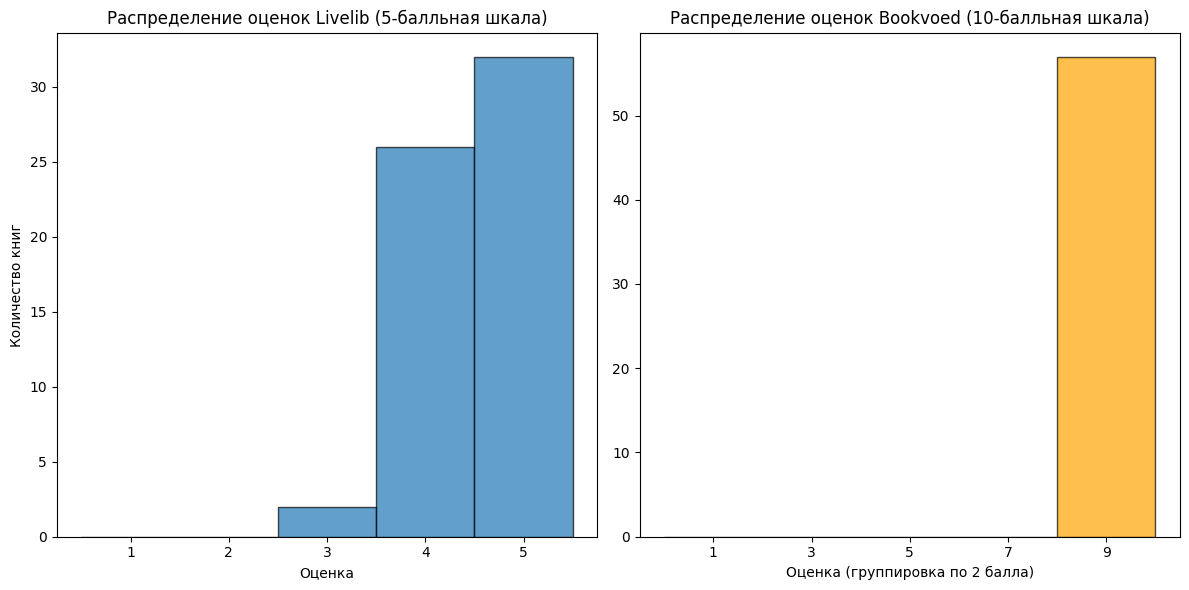


Средний рейтинг Livelib (нормализованный): 8.77
Средний рейтинг Bookvoed: 9.11
На Bookvoed оценки в среднем выше


In [2]:
# Анализ и Сравнение количества оценок
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
livelib = pd.read_csv('livelib_books.csv', sep=',')
bookvoed = pd.read_csv('bookvoed_data.csv', sep=',')

# Функция для обработки рейтингов
def process_ratings(df, scale):
    df_clean = df.dropna(subset=['Рейтинг'])
    df_clean['Рейтинг'] = pd.to_numeric(df_clean['Рейтинг'], errors='coerce')
    df_clean = df_clean.dropna(subset=['Рейтинг'])
    df_clean = df_clean[(df_clean['Рейтинг'] >= 0) & (df_clean['Рейтинг'] <= scale)]
    df_clean['Нормализованный рейтинг'] = df_clean['Рейтинг'] * (10 / scale)
    return df_clean

# Обработка данных
livelib_processed = process_ratings(livelib, scale=5)
bookvoed_processed = process_ratings(bookvoed, scale=10)

# Расчет средних
mean_livelib = livelib_processed['Нормализованный рейтинг'].mean()
mean_bookvoed = bookvoed_processed['Нормализованный рейтинг'].mean()

# Создание графиков
plt.figure(figsize=(12, 6))

# График для Livelib (5-балльная шкала)
plt.subplot(1, 2, 1)
livelib_bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]  # Границы для 5 категорий
plt.hist(livelib_processed['Рейтинг'], bins=livelib_bins, edgecolor='black', alpha=0.7)
plt.xticks([1, 2, 3, 4, 5])
plt.title('Распределение оценок Livelib (5-балльная шкала)')
plt.xlabel('Оценка')
plt.ylabel('Количество книг')

# График для Bookvoed (группировка 10-балльной в 5 категорий)
plt.subplot(1, 2, 2)
bookvoed_bins = [0, 2, 4, 6, 8, 10]  # Интервалы: 1-2, 3-4, 5-6, 7-8, 9-10
plt.hist(bookvoed_processed['Рейтинг'], bins=bookvoed_bins, edgecolor='black', alpha=0.7, color='orange')
plt.xticks([1, 3, 5, 7, 9])
plt.title('Распределение оценок Bookvoed (10-балльная шкала)')
plt.xlabel('Оценка (группировка по 2 балла)')

plt.tight_layout()
plt.show()

# Вывод сравнения средних
print(f"\nСредний рейтинг Livelib (нормализованный): {mean_livelib:.2f}")
print(f"Средний рейтинг Bookvoed: {mean_bookvoed:.2f}")

if mean_livelib > mean_bookvoed:
    print("На Livelib оценки в среднем выше")
elif mean_bookvoed > mean_livelib:
    print("На Bookvoed оценки в среднем выше")
else:
    print("Средние оценки равны")


Средняя оценка на Bookvoed выше, чем на Livellb, даже после нормализации. Это может указывать на:

Более высокое качество книг на Bookvoed.

Разницу в предпочтениях аудитории.

Особенности системы оценивания (например, пользователи Bookvoed склонны завышать оценки).